![image.png](attachment:image.png)

# Support Vector Machine(SVM) -Classification Algorithm-Practical Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df.shape

(400, 5)

In [3]:
X = df.iloc[:, [2,3]]
Y = df.iloc[:, 4]

In [4]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [5]:
Y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [6]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [7]:
print("Training data : ",X_Train.shape)
print("Training data : ",X_Test.shape)

Training data :  (300, 2)
Training data :  (100, 2)


In [8]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Applying Support Vector Machine

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [10]:
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [11]:
from sklearn import metrics
print('Accuracy Score: with linear kernel')

print(metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy Score: with linear kernel
0.9


In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))


Accuracy Score: with default rbf kernel
0.93


In [13]:
#
from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', gamma = 10,  random_state=0)  # 93% accuracy
classifier = SVC(kernel = 'rbf', gamma = 15, C=7,  random_state=0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

print('Accuracy Score On Test Data: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))


Accuracy Score On Test Data: with default rbf kernel
0.89


In [14]:
svc=SVC(kernel='poly', degree = 4)
svc.fit(X_Train,Y_Train)

y_pred=svc.predict(X_Test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(Y_Test,Y_Pred))


Accuracy Score:with poly kernel and degree 
0.89


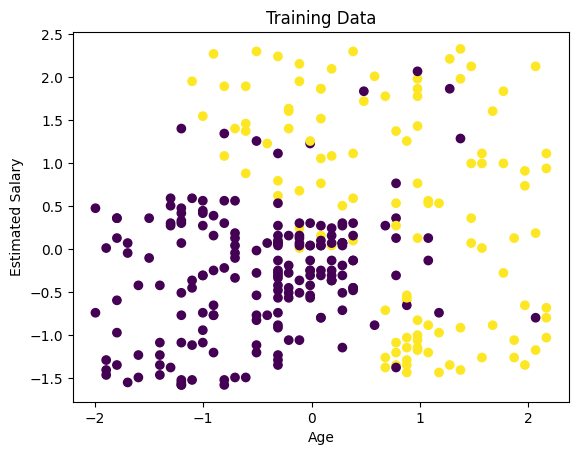

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()


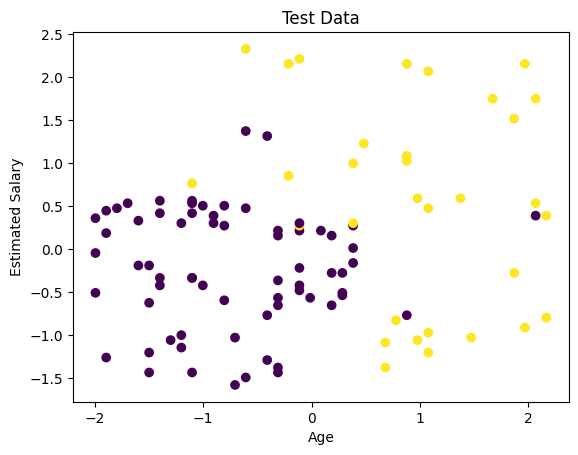

In [16]:
import matplotlib.pyplot as plt


plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Data')
plt.show()


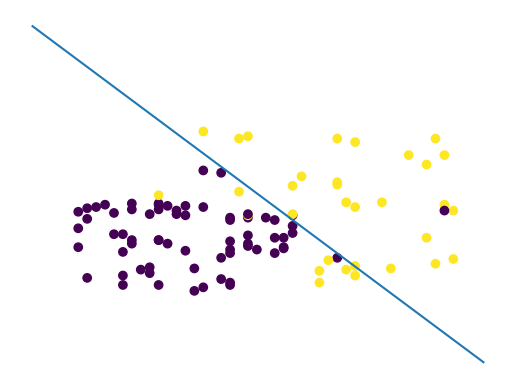

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

# Plot data points

plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)
#plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train)

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();